In [27]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from hawkeslib import UnivariateExpHawkesProcess as UVHP
from datetime import datetime as dt
from hawkeslib import BayesianUVExpHawkesProcess as BUVHP

CPU times: user 221 µs, sys: 0 ns, total: 221 µs
Wall time: 229 µs


In [2]:
df = pd.read_csv("earthquake_all_month.csv")

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-03-26T02:25:39.767Z,59.735700,-152.291900,75.900000,1.90,ml,NaN,NaN,NaN,0.24,...,2022-03-26T02:28:53.957Z,"26 km W of Anchor Point, Alaska",earthquake,NaN,0.70,NaN,NaN,automatic,ak,ak
1,2022-03-26T02:22:46.640Z,19.267166,-155.426666,32.139999,2.44,ml,38.0,166.0,NaN,0.10,...,2022-03-26T02:28:17.760Z,"8 km NE of Pāhala, Hawaii",earthquake,0.71,0.96,0.320,3.0,automatic,hv,hv
2,2022-03-26T02:18:48.841Z,62.481300,-148.283200,25.700000,1.80,ml,NaN,NaN,NaN,0.91,...,2022-03-26T02:31:46.303Z,"76 km N of Chickaloon, Alaska",earthquake,NaN,1.20,NaN,NaN,automatic,ak,ak
3,2022-03-26T01:47:39.580Z,33.488000,-116.554500,7.640000,0.70,ml,28.0,48.0,0.04042,0.17,...,2022-03-26T01:51:18.078Z,"13km SE of Anza, CA",earthquake,0.23,0.49,0.122,21.0,automatic,ci,ci
4,2022-03-26T01:39:53.790Z,19.211834,-155.417496,28.400000,2.09,md,28.0,157.0,NaN,0.13,...,2022-03-26T01:43:11.640Z,"6 km E of Pāhala, Hawaii",earthquake,0.59,1.43,1.540,10.0,automatic,hv,hv


In [4]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9726.000000,9726.000000,9726.000000,9726.000000,7019.000000,8307.000000,6748.000000,9726.000000,7491.000000,9726.000000,7792.000000,8306.000000
mean,35.543012,-103.740759,22.892684,1.698693,20.333238,121.496873,0.780609,0.269667,1.893965,2.370148,0.273763,14.627378
std,19.804172,73.872100,56.052720,1.295715,16.644685,65.969703,2.617632,0.288712,3.221900,5.256760,0.520303,27.922866
min,-64.643900,-179.924500,-3.500000,-1.360000,2.000000,13.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.062542,-147.357925,3.090000,0.840000,8.000000,71.000000,0.016920,0.080000,0.270000,0.470000,0.100000,4.000000
50%,38.149800,-119.566050,8.560000,1.410000,15.000000,106.000000,0.058330,0.140000,0.500000,0.800000,0.157728,7.000000
75%,44.428958,-112.197542,16.647500,2.110000,28.000000,160.000000,0.186000,0.380000,1.270000,1.800000,0.236000,16.000000
max,85.373300,179.975100,644.460000,7.300000,198.000000,353.000000,45.917000,2.330000,38.500000,73.900000,5.290000,761.000000


In [5]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [6]:
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [7]:
df['locationSource'].value_counts()

nc    1969
ci    1513
ak    1419
us    1288
hv     672
nn     602
pr     565
uu     402
av     374
uw     297
mb     228
ok     214
tx     132
nm      42
se       9
Name: locationSource, dtype: int64

In [20]:
df_CA = df[df['locationSource'] == 'ok']
df_CA.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
180,2022-03-25T07:01:58.560Z,36.693500,-97.680000,5.00,1.78,ml,90.0,50.0,0.214158,0.26,...,2022-03-25T12:30:27.811Z,"10 km ESE of Jefferson, Oklahoma",earthquake,NaN,0.5,0.24,33.0,reviewed,ok,ok
247,2022-03-25T02:53:35.799Z,36.478500,-98.741000,8.12,1.32,ml,45.0,62.0,0.033293,0.19,...,2022-03-25T12:44:37.265Z,"16 km SE of Waynoka, Oklahoma",earthquake,NaN,0.5,0.18,17.0,reviewed,ok,ok
289,2022-03-24T23:38:25.260Z,36.109167,-97.219333,8.92,0.75,ml,36.0,68.0,0.151170,0.26,...,2022-03-25T14:00:28.849Z,"14 km W of Stillwater, Oklahoma",earthquake,NaN,3.2,0.25,11.0,reviewed,ok,ok
451,2022-03-24T12:11:56.979Z,35.117667,-95.525500,7.58,0.95,ml,26.0,126.0,0.096281,0.45,...,2022-03-25T13:40:55.633Z,"13 km E of Crowder, Oklahoma",earthquake,NaN,1.4,0.16,5.0,reviewed,ok,ok
474,2022-03-24T11:16:21.399Z,35.859833,-96.683333,7.69,0.79,ml,34.0,86.0,0.151170,0.25,...,2022-03-25T13:35:50.847Z,"10 km WSW of Shamrock, Oklahoma",earthquake,NaN,1.1,0.17,14.0,reviewed,ok,ok


In [21]:
df_CA.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
9614,2022-02-24T11:11:04.160Z,35.112333,-95.528667,7.76,0.47,ml,18.0,127.0,0.101680,0.24,...,2022-02-28T18:19:11.860Z,"12 km E of Crowder, Oklahoma",earthquake,NaN,0.9,0.28,4.0,reviewed,ok,ok
9666,2022-02-24T07:34:25.120Z,36.128167,-97.590000,7.10,1.97,ml,99.0,39.0,0.000000,0.21,...,2022-02-24T13:26:12.518Z,"4 km SE of Marshall, Oklahoma",earthquake,NaN,0.4,0.27,39.0,reviewed,ok,ok
9668,2022-02-24T07:12:47.100Z,35.048333,-97.639667,8.80,2.24,ml,75.0,31.0,0.099880,0.25,...,2022-03-16T05:34:48.154Z,"1 km NNW of Dibble, Oklahoma",earthquake,NaN,1.4,0.22,35.0,reviewed,ok,ok
9687,2022-02-24T06:08:35.390Z,36.094667,-97.839167,5.58,0.78,ml,19.0,73.0,0.122376,0.19,...,2022-02-28T16:55:25.786Z,"5 km ESE of Hennessey, Oklahoma",earthquake,NaN,0.8,0.14,7.0,reviewed,ok,ok
9691,2022-02-24T05:49:57.520Z,36.369167,-97.348167,4.20,1.20,ml,63.0,121.0,0.086383,0.33,...,2022-02-28T17:13:46.575Z,"10 km NNW of Perry, Oklahoma",earthquake,NaN,0.8,0.26,17.0,reviewed,ok,ok


In [22]:
timestamps = [dt.strptime(l[:19], "%Y-%m-%dT%H:%M:%S") for l in df_CA["time"]]
t = np.array([(x - timestamps[-1]).total_seconds() / 3600 for x in timestamps])[::-1]

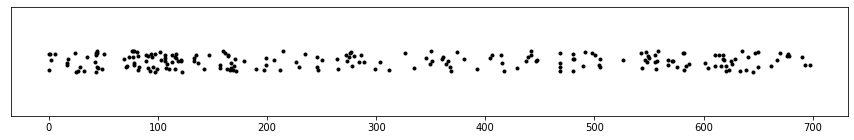

In [23]:
plt.figure(figsize = (15,2))
plt.ylim([-5,5])
plt.yticks([])
plt.plot(t, 2*np.random.rand(len(t))-1, '.k')

In [26]:
%time
uv = UVHP()
uv.fit(t)
print(uv.get_params())

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs
(0.20034222149720385, 0.3492225196734029, 0.46580909560974454)


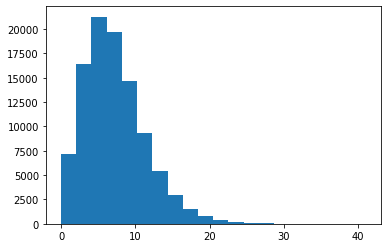

In [32]:
nr_shocks_sample = [len(uv.sample(24)) for x in range(100000)]
_ = plt.hist(nr_shocks_sample, bins=20)

In [30]:
buv = BUVHP(mu_hyp=(1., 10.), alpha_hyp=(1., 1.), theta_hyp=(1., 10.))
trace = buv.sample_posterior(t, T=t[-1], n_samp=50000)
print(np.quantile(trace["alpha"], [0.025, 0.975]))
print(np.quantile(trace["theta"], [0.025, 0.975]))

[0.14720863 0.50863977]
[0.20722452 2.07777683]


In [31]:
buv = BUVHP(mu_hyp=(1., 5.), alpha_hyp=(1., 1.), theta_hyp=(1., 5.))
trace = buv.sample_posterior(t, T=t[-1], n_samp=50000)
print(np.quantile(trace["alpha"], [0.025, 0.975]))
print(np.quantile(trace["theta"], [0.025, 0.975]))

[0.15965598 0.51983713]
[0.21274547 1.33737297]
